In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Disable SetttingwithCopyWarning
pd.set_option('mode.chained_assignment', None)

In [2]:
# Get the data from CSV
dfDonations = pd.read_csv('donations.csv', header=0, index_col=0)

# See a sample of data
dfDonations.sample(3)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
nationbuilder_id,,,,,,,,,,,,,,,,
287,Donation,$25.00,Credit Card,6278,6/2/2020 15:12,general_donation,NaN,Victoria,BC,V8Y,Canada,CA,True,True,Chris Thompson,donor
351,Donation,$25.00,Credit Card,6361,6/2/2020 17:32,general_donation,NaN,Edmonton,Alberta,T6X,Canada,CA,NaN,True,Chris Thompson,donor
1582,Donation,$25.00,Credit Card,8926,4/8/2021 20:01,general_donation,active,Courtice,ON,L1E,Canada,CA,True,True,NaN,"donor,EN,newsletter,Ontario"


In [3]:
# See an overview of the data
dfDonations.describe()

,donor_id
count,1594.000000
mean,6748.183187
std,722.496930
min,541.000000
25%,6269.250000
50%,6679.000000
75%,7157.750000
max,9537.000000


In [4]:
# Check for null values
dfDonations.isnull().sum()

type                                    0
amount                                  0
payment_type_name                       0
donor_id                                0
donation_date                           0
donation_type                           1
recurring_donation_status            1181
billing_city                            0
billing_state                          35
billing_FSA                             0
billing_country                         0
billing_country_code                    0
signup_email_opt_in                   568
signup_mobile_opt_in                   11
signup_point_person_name_or_email    1055
signup_tag_list                        19
dtype: int64

In [5]:
# TODO: Figure out what to do with the null values
# - [] Recurring donation status
# - [] Billing state
# - [] Signup email opt in
# - [] Signup mobile opt in
# - [] Signup name/email
# - [] Tag list

# No action required to be taken now
# Null values can be dealt with accordingly depending on the analysis

In [6]:
# See the data types
dfDonations.dtypes

type                                 object
amount                               object
payment_type_name                    object
donor_id                              int64
donation_date                        object
donation_type                        object
recurring_donation_status            object
billing_city                         object
billing_state                        object
billing_FSA                          object
billing_country                      object
billing_country_code                 object
signup_email_opt_in                  object
signup_mobile_opt_in                 object
signup_point_person_name_or_email    object
signup_tag_list                      object
dtype: object

In [7]:
# See sample df again to see if data type makes sense
dfDonations.sample(3)

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list
nationbuilder_id,,,,,,,,,,,,,,,,
674,Donation,$50.00,Credit Card,6784,6/4/2020 11:50,general_donation,NaN,Saskatoon,SK,S7L,Canada,CA,True,True,NaN,donor
131,Donation,$100.00,Credit Card,6080,6/1/2020 23:45,general_donation,NaN,Edmonton,Alberta,T6C,Canada,CA,True,True,Chris Thompson,donor
984,Donation,$100.00,Credit Card,7212,6/11/2020 0:54,general_donation,NaN,Waterloo,ON,N2T,Canada,CA,True,True,NaN,donor


In [8]:
# column                             | origin type | change to 
# ------------------------------------------------------------
# type                               | object      | string     
# amount                             | object      | double      
# payment_type_name                  | object      | string      
# donor_id                           |  int64      | string      
# donation_date                      | object      | datetime      
# donation_type                      | object      | string      
# recurring_donation_status          | object      | string
# billing_city                       | object      | string
# billing_state                      | object      | string
# billing_FSA                        | object      | string
# billing_country                    | object      | string
# billing_country_code               | object      | string
# signup_email_opt_in                | object      | bool
# signup_mobile_opt_in               | object      | bool  
# signup_point_person_name_or_email  | object      | string  
# signup_tag_list                    | object      | list     

# Note:
# - Python doesn't have built in datetime, pandas do though, I think
# - Pignup tag list can stay as a string, for now

# Realistically, only need to change amount and donor_id
# Python can't make the conversion to bool properly for signup_email_opt_in, and signup_email_opt_in
# We will deal with that manually later

In [9]:
# Create a dict for conversion
convert_dict = {
    "amount": float,
    "donor_id": str,
}

In [10]:
# Map it onto dataframe
# The amount column will give us problem though

# Strip the dollar sign and commas form that column
dfDonations['amount'] =  dfDonations['amount'].str.replace(',', '').str.replace('$', '')

# Then map it
dfDonations = dfDonations.astype(convert_dict)

In [11]:
# Now to deal with the two bool columns
# Let's look at their unique values
print(f"""
Unique values in column:
signup_email_opt_in = {dfDonations['signup_email_opt_in'].unique()}
signup_mobile_opt_in = {dfDonations['signup_mobile_opt_in'].unique()}
""")


Unique values in column:
signup_email_opt_in = [True nan]
signup_mobile_opt_in = [True nan]



In [12]:
# If it is "True", convert it to python bool True, and if nan, False

dfDonations["signup_email_opt_in"] = np.where(
    dfDonations["signup_email_opt_in"] == True, True, False
)

dfDonations["signup_mobile_opt_in"] = np.where(
    dfDonations["signup_mobile_opt_in"] == True, True, False
)

print(f"""
Unique values in column:
signup_email_opt_in = {dfDonations['signup_email_opt_in'].unique()}
signup_mobile_opt_in = {dfDonations['signup_mobile_opt_in'].unique()}
""")

# Note: I realized after that the True value in that column is already a bool
# So could've just changed the nans to False, but we will stick with this, it works too


Unique values in column:
signup_email_opt_in = [ True False]
signup_mobile_opt_in = [ True False]



In [13]:
# No errors, assume the conversion was successful

# See the data types again
dfDonations.dtypes

type                                  object
amount                               float64
payment_type_name                     object
donor_id                              object
donation_date                         object
donation_type                         object
recurring_donation_status             object
billing_city                          object
billing_state                         object
billing_FSA                           object
billing_country                       object
billing_country_code                  object
signup_email_opt_in                     bool
signup_mobile_opt_in                    bool
signup_point_person_name_or_email     object
signup_tag_list                       object
dtype: object

In [14]:
# To answer this question, need to look at two things
#   1. How many donations were made on a monthly basis
#   2. How many of these donations are one time vs. recurring

# For #2, two columns would be useful

print(f"""
Unique values in column:
donation_type = {dfDonations['donation_type'].unique()}
recurring_donation_status = {dfDonations['recurring_donation_status'].unique()}
""")


Unique values in column:
donation_type = [nan 'annual_membership_fee' 'general_donation']
recurring_donation_status = [nan 'canceled' 'active']



In [15]:
# There are some nan values threre
# Let's look at the null values again just to see
dfDonations.isnull().sum()

type                                    0
amount                                  0
payment_type_name                       0
donor_id                                0
donation_date                           0
donation_type                           1
recurring_donation_status            1181
billing_city                            0
billing_state                          35
billing_FSA                             0
billing_country                         0
billing_country_code                    0
signup_email_opt_in                     0
signup_mobile_opt_in                    0
signup_point_person_name_or_email    1055
signup_tag_list                        19
dtype: int64

In [16]:
# Since recurring_donation_status has 1181 nulls,
# We can modify the dataframe to inclue the our own definition "onetime_contrib"

# We can assume that if the donation is recurring if it is either
#   - An annual_membership_fee, OR
#   - Has an 'active' recurring_donation_status

# Anything else would be considered 'one-time'

dfDonations["onetime_contrib"] = np.where(
    (dfDonations["donation_type"] == "annual_membership_fee")
    | (dfDonations["recurring_donation_status"] == "active"),
    False,
    True,
)

# Double check
dfDonations["onetime_contrib"].unique()

# TODO: Cancel used to be recurring so need to change that

array([ True, False])

In [17]:
# Now for #1, we need to be able to block the data into months
# So we need datetime, luckily pandas has a built in datetime function
# There's no null in the date column, so that is good

dfDonations['donation_date'] = pd.to_datetime(dfDonations['donation_date'])

In [18]:
# Now let's group by months and see distributions in terms of count
dfDonationsByMonthsCount = dfDonations.groupby(dfDonations["donation_date"].dt.month)["amount"].count()

dfDonationsByMonthsCount

donation_date
1       42
2       40
3       33
4       30
5       93
6     1050
7       87
8       51
9       44
10      41
11      41
12      42
Name: amount, dtype: int64

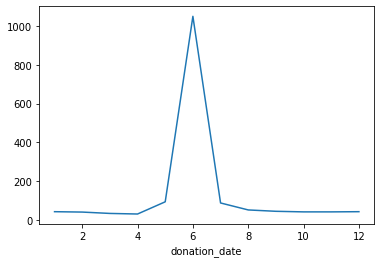

In [19]:
dfDonationsByMonthsCount.plot()
plt.show()

In [20]:
# Now let's group by months and see distributions in terms of sum of amount
dfDonationsByMonthsSum = dfDonations.groupby(dfDonations["donation_date"].dt.month)["amount"].sum()

dfDonationsByMonthsSum

donation_date
1      1273.00
2      6880.00
3      1203.00
4       592.50
5      3799.00
6     76789.03
7      9421.31
8      2227.19
9      2383.00
10     1688.00
11     1315.00
12     3429.50
Name: amount, dtype: float64

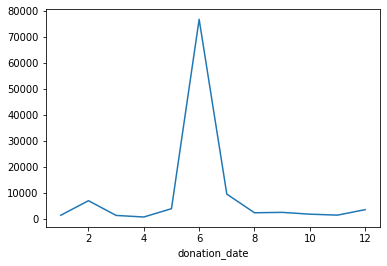

In [21]:
dfDonationsByMonthsSum.plot()
plt.show()

In [22]:
#So we want to view the distribution of monthly and one-time donations in the system. The type is an object for now but we
#don't know if that will cause any issues, so I will leave it for now. I do know that null values should be replaced with
#a one-time donation status, so I'll change nulls to one_time
values = {"recurring_donation_status": "one_time"}
dfDonations = dfDonations.fillna(value=values)
dfDonations

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list,onetime_contrib
nationbuilder_id,,,,,,,,,,,,,,,,,
1,Donation,125.00,Credit Card,541,2020-01-08 12:41:00,NaN,one_time,Markham,Ontario,L3P,Canada,CA,True,True,Chris Thompson,"Black Fund Signatory,defundpolicesurvey,Genera...",True
10,Donation,25.00,Credit Card,5509,2020-05-11 22:10:00,annual_membership_fee,one_time,St-Hubert,Quebec,J4T,Canada,CA,True,True,NaN,"FR,General Member,newsletter,Ontario,Paid Memb...",False
100,Donation,15.00,Credit Card,6039,2020-06-01 16:53:00,general_donation,one_time,Ottawa,Ontario,K1G,Canada,CA,False,True,Chris Thompson,donor,True
1000,Donation,15.00,Credit Card,7233,2020-06-11 17:30:00,general_donation,one_time,Orillia,ON,L3V,Canada,CA,False,True,NaN,"donor,Elder Prospects,General Member,Non - bla...",True
1001,Donation,100.00,Credit Card,7234,2020-06-11 17:38:00,general_donation,one_time,Mississauga,Ontario,L5G,Canada,CA,True,True,NaN,donor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Donation,25.00,Credit Card,7227,2020-06-11 14:36:00,annual_membership_fee,one_time,Toronto,Ontario,M4X,Canada,CA,True,True,Chris Thompson,"2021 PIP List,defundpolicesurvey,General Membe...",False
996,Donation,74.15,Credit Card,7229,2020-06-11 15:59:00,general_donation,one_time,Mississauga,Ontario,L5B,Canada,CA,False,True,NaN,donor,True
997,Donation,500.00,Credit Card,7230,2020-06-11 16:00:00,general_donation,one_time,Vancouver,British Columbia,V5Y,Canada,CA,True,True,NaN,donor,True


In [23]:
#Check the unique values within the column
dfDonations["recurring_donation_status"].unique()

array(['one_time', 'canceled', 'active'], dtype=object)

In [24]:
#Amounts are going to be important to see if a donation is legitimate, so lets see how many null values are in there
dfDonations.isnull().sum()

type                                    0
amount                                  0
payment_type_name                       0
donor_id                                0
donation_date                           0
donation_type                           1
recurring_donation_status               0
billing_city                            0
billing_state                          35
billing_FSA                             0
billing_country                         0
billing_country_code                    0
signup_email_opt_in                     0
signup_mobile_opt_in                    0
signup_point_person_name_or_email    1055
signup_tag_list                        19
onetime_contrib                         0
dtype: int64

In [25]:
dfDonations[dfDonations["amount"].isna()]

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list,onetime_contrib
nationbuilder_id,,,,,,,,,,,,,,,,,


In [26]:
#So I know later that I will be using the donation amount to see when the biggest donations come in, so I'm going to make
#it a float value
def is_number(x):
    try:
        float(x)
    except ValueError:
        return False
    else:
        return True
dfDonations["amount"] = dfDonations["amount"].astype('str')
dfDonations["amount"] = dfDonations["amount"].str.replace('$','', regex="true")
dfDonations["amount"] = pd.to_numeric(dfDonations["amount"], errors='coerce')
dfDonations.dtypes

type                                         object
amount                                      float64
payment_type_name                            object
donor_id                                     object
donation_date                        datetime64[ns]
donation_type                                object
recurring_donation_status                    object
billing_city                                 object
billing_state                                object
billing_FSA                                  object
billing_country                              object
billing_country_code                         object
signup_email_opt_in                            bool
signup_mobile_opt_in                           bool
signup_point_person_name_or_email            object
signup_tag_list                              object
onetime_contrib                                bool
dtype: object

In [27]:
#Lets check if there are any null values in the amount column
dfDonations.isnull().sum()

type                                    0
amount                                  0
payment_type_name                       0
donor_id                                0
donation_date                           0
donation_type                           1
recurring_donation_status               0
billing_city                            0
billing_state                          35
billing_FSA                             0
billing_country                         0
billing_country_code                    0
signup_email_opt_in                     0
signup_mobile_opt_in                    0
signup_point_person_name_or_email    1055
signup_tag_list                        19
onetime_contrib                         0
dtype: int64

In [28]:
dfDonations[dfDonations["amount"].isna()]

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list,onetime_contrib
nationbuilder_id,,,,,,,,,,,,,,,,,


In [29]:
#Lets remove these one time donations, because we dont know why they are null and we can't assume their value
dfDonations = dfDonations[dfDonations['amount'].notna()]
dfDonations

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list,onetime_contrib
nationbuilder_id,,,,,,,,,,,,,,,,,
1,Donation,125.00,Credit Card,541,2020-01-08 12:41:00,NaN,one_time,Markham,Ontario,L3P,Canada,CA,True,True,Chris Thompson,"Black Fund Signatory,defundpolicesurvey,Genera...",True
10,Donation,25.00,Credit Card,5509,2020-05-11 22:10:00,annual_membership_fee,one_time,St-Hubert,Quebec,J4T,Canada,CA,True,True,NaN,"FR,General Member,newsletter,Ontario,Paid Memb...",False
100,Donation,15.00,Credit Card,6039,2020-06-01 16:53:00,general_donation,one_time,Ottawa,Ontario,K1G,Canada,CA,False,True,Chris Thompson,donor,True
1000,Donation,15.00,Credit Card,7233,2020-06-11 17:30:00,general_donation,one_time,Orillia,ON,L3V,Canada,CA,False,True,NaN,"donor,Elder Prospects,General Member,Non - bla...",True
1001,Donation,100.00,Credit Card,7234,2020-06-11 17:38:00,general_donation,one_time,Mississauga,Ontario,L5G,Canada,CA,True,True,NaN,donor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Donation,25.00,Credit Card,7227,2020-06-11 14:36:00,annual_membership_fee,one_time,Toronto,Ontario,M4X,Canada,CA,True,True,Chris Thompson,"2021 PIP List,defundpolicesurvey,General Membe...",False
996,Donation,74.15,Credit Card,7229,2020-06-11 15:59:00,general_donation,one_time,Mississauga,Ontario,L5B,Canada,CA,False,True,NaN,donor,True
997,Donation,500.00,Credit Card,7230,2020-06-11 16:00:00,general_donation,one_time,Vancouver,British Columbia,V5Y,Canada,CA,True,True,NaN,donor,True


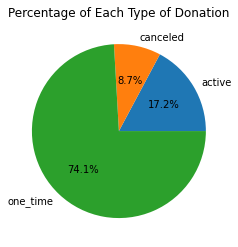

In [30]:
graphData = dfDonations.groupby('recurring_donation_status').size()/dfDonations.shape[0]
graphData.plot.pie(autopct="%.1f%%")
plt.title("Percentage of Each Type of Donation")
plt.ylabel('')
plt.show()

# MY WORK

# Q5

In [31]:
# first lets check the unique amount of donation statuses

dfDonations['recurring_donation_status'].unique()

array(['one_time', 'canceled', 'active'], dtype=object)

In [32]:
#lets define a dictionary called portfolio that would map the donor id to the donation statuses of that person
portfolio={}

# adding values in the portfolio
for i in dfDonations.donor_id.unique():
    portfolio[i]=dfDonations[dfDonations.donor_id==i]['recurring_donation_status'].values

In [33]:
portfolio

{'541': array(['one_time'], dtype=object),
 '5509': array(['one_time'], dtype=object),
 '6039': array(['one_time'], dtype=object),
 '7233': array(['one_time'], dtype=object),
 '7234': array(['one_time'], dtype=object),
 '7236': array(['one_time'], dtype=object),
 '7238': array(['one_time'], dtype=object),
 '7239': array(['one_time'], dtype=object),
 '6849': array(['one_time', 'one_time', 'one_time'], dtype=object),
 '5711': array(['canceled', 'canceled', 'canceled', 'canceled'], dtype=object),
 '7210': array(['one_time', 'one_time', 'one_time'], dtype=object),
 '7242': array(['one_time'], dtype=object),
 '7243': array(['one_time'], dtype=object),
 '6041': array(['one_time'], dtype=object),
 '7245': array(['one_time'], dtype=object),
 '7246': array(['one_time'], dtype=object),
 '7247': array(['one_time'], dtype=object),
 '7248': array(['one_time', 'one_time'], dtype=object),
 '7249': array(['one_time'], dtype=object),
 '7252': array(['canceled', 'canceled', 'canceled', 'canceled', 'canc

In [34]:
# here we create a new column called month in which it stores the month in which a donation status was there
dfDonations['month']=pd.DatetimeIndex(dfDonations['donation_date']).month

In [35]:
# here we print the donor id and his portfolio and the donation status along with the month
for i in portfolio:
        print(i,dfDonations[dfDonations.donor_id==i][['recurring_donation_status','month']].values)
        print('                          ')

541 [['one_time' 1]]
                          
5509 [['one_time' 5]]
                          
6039 [['one_time' 6]]
                          
7233 [['one_time' 6]]
                          
7234 [['one_time' 6]]
                          
7236 [['one_time' 6]]
                          
7238 [['one_time' 6]]
                          
7239 [['one_time' 6]]
                          
6849 [['one_time' 6]
 ['one_time' 6]
 ['one_time' 6]]
                          
5711 [['canceled' 6]
 ['canceled' 7]
 ['canceled' 8]
 ['canceled' 5]]
                          
7210 [['one_time' 6]
 ['one_time' 6]
 ['one_time' 6]]
                          
7242 [['one_time' 6]]
                          
7243 [['one_time' 6]]
                          
6041 [['one_time' 6]]
                          
7245 [['one_time' 6]]
                          
7246 [['one_time' 6]]
                          
7247 [['one_time' 6]]
                          
7248 [['one_time' 6]
 ['one_time' 6]]
                  

6060 [['one_time' 6]]
                          
7634 [['one_time' 7]]
                          
7066 [['active' 7]
 ['active' 8]
 ['active' 9]
 ['active' 10]
 ['active' 11]
 ['active' 12]
 ['active' 1]
 ['active' 2]
 ['active' 3]
 ['active' 4]
 ['active' 5]
 ['active' 6]
 ['active' 6]]
                          
7084 [['active' 7]
 ['active' 8]
 ['active' 9]
 ['active' 10]
 ['active' 11]
 ['active' 12]
 ['active' 1]
 ['active' 2]
 ['active' 3]
 ['active' 4]
 ['active' 5]
 ['active' 6]
 ['active' 6]]
                          
7647 [['one_time' 7]]
                          
7650 [['one_time' 7]]
                          
7651 [['one_time' 7]]
                          
7652 [['one_time' 7]]
                          
6061 [['one_time' 6]]
                          
7168 [['canceled' 7]
 ['canceled' 8]
 ['canceled' 9]
 ['canceled' 10]
 ['canceled' 11]
 ['canceled' 12]
 ['canceled' 1]
 ['canceled' 6]]
                          
7193 [['active' 7]
 ['active' 8]
 ['active' 9]
 ['active'

6165 [['one_time' 6]]
                          
950 [['one_time' 1]]
                          
5763 [['one_time' 5]]
                          
6166 [['one_time' 6]]
                          
6167 [['one_time' 6]]
                          
6168 [['one_time' 6]]
                          
6169 [['one_time' 6]]
                          
6170 [['one_time' 6]]
                          
6171 [['one_time' 6]]
                          
6172 [['one_time' 6]]
                          
6173 [['one_time' 6]]
                          
6174 [['one_time' 6]]
                          
6175 [['one_time' 6]]
                          
5766 [['one_time' 5]]
                          
6176 [['one_time' 6]]
                          
6177 [['one_time' 6]]
                          
6179 [['one_time' 6]]
                          
6178 [['one_time' 6]]
                          
6180 [['one_time' 6]]
                          
6182 [['one_time' 6]]
                          
6183 [['one_time' 6]]

6402 [['one_time' 6]]
                          
6412 [['one_time' 6]]
                          
6413 [['one_time' 6]]
                          
6414 [['one_time' 6]]
                          
6415 [['one_time' 6]]
                          
6416 [['one_time' 6]]
                          
6417 [['one_time' 6]]
                          
6418 [['one_time' 6]]
                          
6419 [['one_time' 6]]
                          
6420 [['one_time' 6]]
                          
6421 [['one_time' 6]]
                          
6422 [['one_time' 6]]
                          
6423 [['one_time' 6]]
                          
6424 [['one_time' 6]]
                          
5349 [['one_time' 2]]
                          
5807 [['one_time' 5]]
                          
6425 [['one_time' 6]]
                          
6426 [['one_time' 6]]
                          
6427 [['one_time' 6]]
                          
6428 [['one_time' 6]]
                          
6429 [['one_time' 6]

6692 [['one_time' 6]]
                          
6693 [['one_time' 6]]
                          
6694 [['one_time' 6]]
                          
6695 [['one_time' 6]]
                          
6696 [['one_time' 6]]
                          
6697 [['one_time' 6]]
                          
6699 [['one_time' 6]]
                          
6701 [['one_time' 6]]
                          
6702 [['one_time' 6]]
                          
5963 [['one_time' 5]]
                          
6704 [['one_time' 6]]
                          
6705 [['one_time' 6]]
                          
6707 [['one_time' 6]]
                          
6710 [['one_time' 6]]
                          
6709 [['one_time' 6]]
                          
6711 [['one_time' 6]]
                          
6712 [['one_time' 6]]
                          
6713 [['one_time' 6]]
                          
6714 [['one_time' 6]]
                          
6715 [['one_time' 6]]
                          
5965 [['one_time' 5]

6944 [['one_time' 6]]
                          
5698 [['one_time' 5]]
                          
6005 [['one_time' 6]]
                          
6945 [['one_time' 6]]
                          
6946 [['one_time' 6]]
                          
6947 [['one_time' 6]]
                          
6948 [['one_time' 6]]
                          
6949 [['one_time' 6]]
                          
6950 [['one_time' 6]]
                          
6951 [['one_time' 6]]
                          
6952 [['one_time' 6]]
                          
6954 [['one_time' 6]]
                          
6959 [['one_time' 6]]
                          
6006 [['one_time' 6]]
                          
6960 [['one_time' 6]]
                          
6962 [['one_time' 6]]
                          
6963 [['one_time' 6]]
                          
6964 [['one_time' 6]]
                          
6966 [['one_time' 6]]
                          
6967 [['one_time' 6]]
                          
6968 [['one_time' 6]

In [36]:
# 
count_of_statuses=dfDonations['recurring_donation_status'].value_counts()

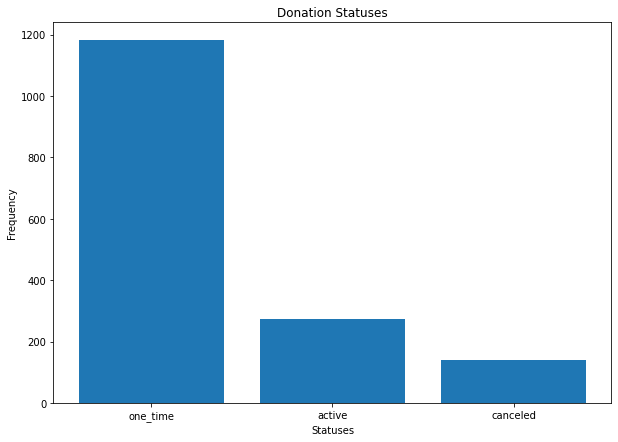

In [37]:
plt.figure(figsize=(10,7))
plt.title("Donation Statuses")
plt.xlabel("Statuses")
plt.ylabel("Frequency")
plt.bar(count_of_statuses.index,count_of_statuses.values)
plt.show()

### Now lets find out who converted from one time donor to active donor

In [38]:
# lets create a new column where if donor has one time donation, we will put 0 else if he is an active donor we will put 1

In [39]:
dfDonations['status']=np.where(dfDonations.recurring_donation_status=='one_time',0,1)

In [40]:
dfDonations.status.value_counts()

0    1181
1     413
Name: status, dtype: int64

In [41]:
# now we iterate for each donor id, if we get a value of 1 after 0
conversion_month={}
conversion_id_list=[]
l=[]
for i in dfDonations.donor_id.values:
    
    df=dfDonations[dfDonations.donor_id==i].sort_values(by='month')  # accessing each donor donations and sorting by month
    l=list(df.status.values)   # getting the status of donations
    print(l)
    if 0 in l and 1 in l:  #we check if there are both 0 and 1 in the list
        for j in range(0,len(l)-1):
            if l[j]==0 and l[j+1]==1:   #we check if we get a 1 after a 0 ie, onetime donation turned into active
                
                conversion_id_list.append(i)   # append the donor id into a list
                conversion_month[i]=(j)
                
       
        

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[1, 1, 1, 1]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 1, 1, 1, 1]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]


[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[0]
[0]
[0, 0, 0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1, 1, 1, 1, 1, 1, 1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[

In [42]:
#creating a dataframe for the list generated
df_conversionlist=pd.DataFrame(conversion_id_list,columns=['converted'])

In [43]:
# checking out unique data points
df_conversionlist.converted.unique()

array(['5710', '7579', '6641', '5806', '8133'], dtype=object)

In [44]:
# now lets create a new dataframe to see which donors converted from onetime to active
df_converted=pd.DataFrame(dfDonations.donor_id.unique(),columns=['Donor_ID'])

In [45]:
df_converted.head()

,Donor_ID
0,541
1,5509
2,6039
3,7233
4,7234


In [46]:
# now lets use the list we created above to add a new column 'Converted'
df_converted['converted']=False
for i in conversion_id_list:
    df_converted['converted']=np.where(df_converted.Donor_ID==i,True,df_converted['converted'])

In [47]:
df_converted['converted'].value_counts()

False    1175
True        5
Name: converted, dtype: int64

### Now lets check insights about these donors

In [48]:
for i in conversion_month:
    print(f'The Donor with ID {i} became an active donor after {conversion_month[i]}th month')

The Donor with ID 5710 became an active donor after 4th month
The Donor with ID 7579 became an active donor after 4th month
The Donor with ID 6641 became an active donor after 7th month
The Donor with ID 5806 became an active donor after 5th month
The Donor with ID 8133 became an active donor after 7th month


In [49]:
for i in conversion_month:
    print(f'The Donor with ID {i} belonged to {dfDonations[dfDonations.donor_id==i].billing_city.unique()[0]} City, {dfDonations[dfDonations.donor_id==i].billing_state.unique()[0]} State, {dfDonations[dfDonations.donor_id==i].billing_country.unique()[0]} ')

The Donor with ID 5710 belonged to Montreal City, QC State, Canada 
The Donor with ID 7579 belonged to Edmonton City, AB State, Canada 
The Donor with ID 6641 belonged to vaughan City, ON State, Canada 
The Donor with ID 5806 belonged to Ottawa City, ON State, Canada 
The Donor with ID 8133 belonged to Kingston City, Ontario State, Canada 


# Q11

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# since we have to analyze one time donors and reccurent donors, we only consider data points belonging to either
dfDonations2=dfDonations[dfDonations.recurring_donation_status!='canceled']

In [53]:
len(dfDonations2)

1455

In [54]:
dfDonations2.head()

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_city,billing_state,billing_FSA,billing_country,billing_country_code,signup_email_opt_in,signup_mobile_opt_in,signup_point_person_name_or_email,signup_tag_list,onetime_contrib,month,status
nationbuilder_id,,,,,,,,,,,,,,,,,,,
1,Donation,125.0,Credit Card,541,2020-01-08 12:41:00,NaN,one_time,Markham,Ontario,L3P,Canada,CA,True,True,Chris Thompson,"Black Fund Signatory,defundpolicesurvey,Genera...",True,1,0
10,Donation,25.0,Credit Card,5509,2020-05-11 22:10:00,annual_membership_fee,one_time,St-Hubert,Quebec,J4T,Canada,CA,True,True,NaN,"FR,General Member,newsletter,Ontario,Paid Memb...",False,5,0
100,Donation,15.0,Credit Card,6039,2020-06-01 16:53:00,general_donation,one_time,Ottawa,Ontario,K1G,Canada,CA,False,True,Chris Thompson,donor,True,6,0
1000,Donation,15.0,Credit Card,7233,2020-06-11 17:30:00,general_donation,one_time,Orillia,ON,L3V,Canada,CA,False,True,NaN,"donor,Elder Prospects,General Member,Non - bla...",True,6,0
1001,Donation,100.0,Credit Card,7234,2020-06-11 17:38:00,general_donation,one_time,Mississauga,Ontario,L5G,Canada,CA,True,True,NaN,donor,True,6,0


In [55]:
# seeing which city has highest value count
dfDonations2.billing_city.value_counts()

Toronto      170
Ottawa       136
Vancouver     88
Calgary       70
Edmonton      64
            ... 
Melville       1
Dundalk        1
Winlaw         1
REgina         1
Kingston       1
Name: billing_city, Length: 345, dtype: int64

Here we see that there are so many different values for billing city. We would consider top 10 cities in our model

In [56]:
# taking top 10 cities according to value counts
city=list(dfDonations2.billing_city.value_counts().head(10).index)

In [57]:
city

['Toronto',
 'Ottawa',
 'Vancouver',
 'Calgary',
 'Edmonton',
 'Montreal',
 'Victoria',
 'Mississauga',
 'Surrey',
 'Richmond Hill']

In [58]:
# handling categorical variables in the city list
for i in city :
    dfDonations2[i]=np.where(dfDonations2['billing_city']==i,1,0)

In [59]:
dfDonations2=dfDonations2.drop('billing_city',axis='columns')

In [60]:
dfDonations2.head()

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_state,billing_FSA,billing_country,...,Toronto,Ottawa,Vancouver,Calgary,Edmonton,Montreal,Victoria,Mississauga,Surrey,Richmond Hill
nationbuilder_id,,,,,,,,,,,,,,,,,,,,,
1,Donation,125.0,Credit Card,541,2020-01-08 12:41:00,NaN,one_time,Ontario,L3P,Canada,...,0,0,0,0,0,0,0,0,0,0
10,Donation,25.0,Credit Card,5509,2020-05-11 22:10:00,annual_membership_fee,one_time,Quebec,J4T,Canada,...,0,0,0,0,0,0,0,0,0,0
100,Donation,15.0,Credit Card,6039,2020-06-01 16:53:00,general_donation,one_time,Ontario,K1G,Canada,...,0,1,0,0,0,0,0,0,0,0
1000,Donation,15.0,Credit Card,7233,2020-06-11 17:30:00,general_donation,one_time,ON,L3V,Canada,...,0,0,0,0,0,0,0,0,0,0
1001,Donation,100.0,Credit Card,7234,2020-06-11 17:38:00,general_donation,one_time,Ontario,L5G,Canada,...,0,0,0,0,0,0,0,1,0,0


##### Now similarly handling categorical values in  billing state 

In [61]:
dfDonations2.billing_state.value_counts()

ON                   341
Ontario              323
BC                   160
AB                    98
Alberta               79
                    ... 
NS                     1
Western Australia      1
B.C.                   1
Canada                 1
British Colombia       1
Name: billing_state, Length: 80, dtype: int64

In [62]:
state=list(dfDonations2.billing_state.value_counts().head(10).index)

In [63]:
for i in state:
    dfDonations2[i]=np.where(dfDonations2.billing_state==i,1,0)

In [64]:
dfDonations2=dfDonations2.drop('billing_state',axis='columns')

In [65]:
dfDonations2.head()

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_FSA,billing_country,billing_country_code,...,ON,Ontario,BC,AB,Alberta,QC,Quebec,British Columbia,NS,NL
nationbuilder_id,,,,,,,,,,,,,,,,,,,,,
1,Donation,125.0,Credit Card,541,2020-01-08 12:41:00,NaN,one_time,L3P,Canada,CA,...,0,1,0,0,0,0,0,0,0,0
10,Donation,25.0,Credit Card,5509,2020-05-11 22:10:00,annual_membership_fee,one_time,J4T,Canada,CA,...,0,0,0,0,0,0,1,0,0,0
100,Donation,15.0,Credit Card,6039,2020-06-01 16:53:00,general_donation,one_time,K1G,Canada,CA,...,0,1,0,0,0,0,0,0,0,0
1000,Donation,15.0,Credit Card,7233,2020-06-11 17:30:00,general_donation,one_time,L3V,Canada,CA,...,1,0,0,0,0,0,0,0,0,0
1001,Donation,100.0,Credit Card,7234,2020-06-11 17:38:00,general_donation,one_time,L5G,Canada,CA,...,0,1,0,0,0,0,0,0,0,0


#### Now handling categorical values in billing  FSA

In [66]:
dfDonations2.billing_FSA.value_counts()

V5T    21
V8T    20
M6H    20
K4A    18
V6Z    18
       ..
G2C     1
L4K     1
A2H     1
291     1
T2V     1
Name: billing_FSA, Length: 587, dtype: int64

In [67]:
fsa=list(dfDonations2.billing_FSA.value_counts().head(10).index)

In [68]:
for i in fsa:
    dfDonations2[i]=np.where(dfDonations2.billing_FSA==i,1,0)

In [69]:
dfDonations2=dfDonations2.drop('billing_FSA',axis='columns')

In [70]:
dfDonations2.head()

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_country,billing_country_code,signup_email_opt_in,...,V5T,V8T,M6H,K4A,V6Z,V1Y,K1K,L4C,M4P,H1N
nationbuilder_id,,,,,,,,,,,,,,,,,,,,,
1,Donation,125.0,Credit Card,541,2020-01-08 12:41:00,NaN,one_time,Canada,CA,True,...,0,0,0,0,0,0,0,0,0,0
10,Donation,25.0,Credit Card,5509,2020-05-11 22:10:00,annual_membership_fee,one_time,Canada,CA,True,...,0,0,0,0,0,0,0,0,0,0
100,Donation,15.0,Credit Card,6039,2020-06-01 16:53:00,general_donation,one_time,Canada,CA,False,...,0,0,0,0,0,0,0,0,0,0
1000,Donation,15.0,Credit Card,7233,2020-06-11 17:30:00,general_donation,one_time,Canada,CA,False,...,0,0,0,0,0,0,0,0,0,0
1001,Donation,100.0,Credit Card,7234,2020-06-11 17:38:00,general_donation,one_time,Canada,CA,True,...,0,0,0,0,0,0,0,0,0,0


#### Now lets handle billing country code

In [71]:
dfDonations2.billing_country_code.value_counts()

CA    1439
US      11
AU       1
MX       1
GB       1
DK       1
DE       1
Name: billing_country_code, dtype: int64

In [72]:
dfDonations2['code']=np.where(dfDonations2.billing_country_code=='CA',1,0)

In [73]:
dfDonations2.head()

,type,amount,payment_type_name,donor_id,donation_date,donation_type,recurring_donation_status,billing_country,billing_country_code,signup_email_opt_in,...,V8T,M6H,K4A,V6Z,V1Y,K1K,L4C,M4P,H1N,code
nationbuilder_id,,,,,,,,,,,,,,,,,,,,,
1,Donation,125.0,Credit Card,541,2020-01-08 12:41:00,NaN,one_time,Canada,CA,True,...,0,0,0,0,0,0,0,0,0,1
10,Donation,25.0,Credit Card,5509,2020-05-11 22:10:00,annual_membership_fee,one_time,Canada,CA,True,...,0,0,0,0,0,0,0,0,0,1
100,Donation,15.0,Credit Card,6039,2020-06-01 16:53:00,general_donation,one_time,Canada,CA,False,...,0,0,0,0,0,0,0,0,0,1
1000,Donation,15.0,Credit Card,7233,2020-06-11 17:30:00,general_donation,one_time,Canada,CA,False,...,0,0,0,0,0,0,0,0,0,1
1001,Donation,100.0,Credit Card,7234,2020-06-11 17:38:00,general_donation,one_time,Canada,CA,True,...,0,0,0,0,0,0,0,0,0,1


In [74]:
dfDonations2.columns

Index(['type', 'amount', 'payment_type_name', 'donor_id', 'donation_date',
       'donation_type', 'recurring_donation_status', 'billing_country',
       'billing_country_code', 'signup_email_opt_in', 'signup_mobile_opt_in',
       'signup_point_person_name_or_email', 'signup_tag_list',
       'onetime_contrib', 'month', 'status', 'Toronto', 'Ottawa', 'Vancouver',
       'Calgary', 'Edmonton', 'Montreal', 'Victoria', 'Mississauga', 'Surrey',
       'Richmond Hill', 'ON', 'Ontario', 'BC', 'AB', 'Alberta', 'QC', 'Quebec',
       'British Columbia', 'NS', 'NL', 'V5T', 'V8T', 'M6H', 'K4A', 'V6Z',
       'V1Y', 'K1K', 'L4C', 'M4P', 'H1N', 'code'],
      dtype='object')

In [75]:
dfDonations2.drop(['type','payment_type_name','donation_date','donation_type','billing_country','billing_country_code', 'signup_email_opt_in', 'signup_mobile_opt_in',
       'signup_point_person_name_or_email', 'signup_tag_list',
       'onetime_contrib'],axis='columns',inplace=True)


In [76]:
dfDonations2.head()

,amount,donor_id,recurring_donation_status,month,status,Toronto,Ottawa,Vancouver,Calgary,Edmonton,...,V8T,M6H,K4A,V6Z,V1Y,K1K,L4C,M4P,H1N,code
nationbuilder_id,,,,,,,,,,,,,,,,,,,,,
1,125.0,541,one_time,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,25.0,5509,one_time,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100,15.0,6039,one_time,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000,15.0,7233,one_time,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1001,100.0,7234,one_time,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
dfDonations2['Reccuring']=np.where(dfDonations2.recurring_donation_status=='one_time',0,1)

In [78]:
dfDonations2.drop('recurring_donation_status',inplace=True,axis='columns')

In [79]:
dfDonations2.head()

,amount,donor_id,month,status,Toronto,Ottawa,Vancouver,Calgary,Edmonton,Montreal,...,M6H,K4A,V6Z,V1Y,K1K,L4C,M4P,H1N,code,Reccuring
nationbuilder_id,,,,,,,,,,,,,,,,,,,,,
1,125.0,541,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,25.0,5509,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100,15.0,6039,6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1000,15.0,7233,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1001,100.0,7234,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
dfDonations2.isnull().sum()

amount              0
donor_id            0
month               0
status              0
Toronto             0
Ottawa              0
Vancouver           0
Calgary             0
Edmonton            0
Montreal            0
Victoria            0
Mississauga         0
Surrey              0
Richmond Hill       0
ON                  0
Ontario             0
BC                  0
AB                  0
Alberta             0
QC                  0
Quebec              0
British Columbia    0
NS                  0
NL                  0
V5T                 0
V8T                 0
M6H                 0
K4A                 0
V6Z                 0
V1Y                 0
K1K                 0
L4C                 0
M4P                 0
H1N                 0
code                0
Reccuring           0
dtype: int64

In [81]:
X=dfDonations2.drop(['Reccuring','donor_id','status'],axis='columns')
y=dfDonations2.Reccuring.values

In [82]:
dfDonations2.Reccuring.value_counts()

0    1181
1     274
Name: Reccuring, dtype: int64

In [83]:
model=LogisticRegression()

In [84]:
model.fit(X,y)

C:\Users\RISHABH JAIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
model.score(X,y)

0.9037800687285223

### Now lets calculate the features that were most common in those who became active donors from one time

In [86]:
#storing the coeff from logistic regression for importance analysis
importance=model.coef_[0]

Feature: 0, Score: -0.06361
Feature: 1, Score: 0.06297
Feature: 2, Score: -1.00792
Feature: 3, Score: -0.94676
Feature: 4, Score: 2.21726
Feature: 5, Score: -1.52341
Feature: 6, Score: -1.49918
Feature: 7, Score: 0.86946
Feature: 8, Score: 1.97629
Feature: 9, Score: -1.25040
Feature: 10, Score: 3.09319
Feature: 11, Score: 0.91444
Feature: 12, Score: 1.73027
Feature: 13, Score: 1.11515
Feature: 14, Score: -0.48028
Feature: 15, Score: 1.20262
Feature: 16, Score: -1.01421
Feature: 17, Score: -0.17819
Feature: 18, Score: -1.26217
Feature: 19, Score: -0.79110
Feature: 20, Score: 1.89295
Feature: 21, Score: 2.08229
Feature: 22, Score: 0.98627
Feature: 23, Score: 1.61261
Feature: 24, Score: 2.33393
Feature: 25, Score: 2.96048
Feature: 26, Score: 4.46313
Feature: 27, Score: 1.97590
Feature: 28, Score: 2.78944
Feature: 29, Score: 1.84195
Feature: 30, Score: 2.18576
Feature: 31, Score: 2.97639
Feature: 32, Score: 0.12697


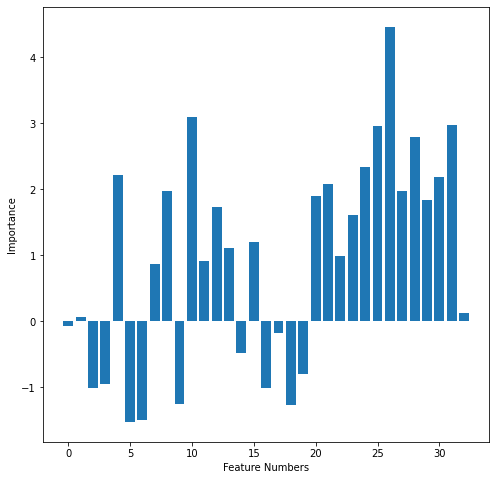

In [87]:
# visualizing the importance of all the features
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.figure(figsize=(8,8))
plt.xlabel('Feature Numbers')
plt.ylabel("Importance")
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [88]:
X.columns

Index(['amount', 'month', 'Toronto', 'Ottawa', 'Vancouver', 'Calgary',
       'Edmonton', 'Montreal', 'Victoria', 'Mississauga', 'Surrey',
       'Richmond Hill', 'ON', 'Ontario', 'BC', 'AB', 'Alberta', 'QC', 'Quebec',
       'British Columbia', 'NS', 'NL', 'V5T', 'V8T', 'M6H', 'K4A', 'V6Z',
       'V1Y', 'K1K', 'L4C', 'M4P', 'H1N', 'code'],
      dtype='object')

### Cities with the highest conversion rate

In [89]:
#calculating by the above graph
print(X.columns[[10,4,11,9,8]].values)

['Surrey' 'Vancouver' 'Richmond Hill' 'Mississauga' 'Victoria']


### States with the highest conversion rate

In [90]:
#calculating by the above graph
print(X.columns[[21,20,13]].values)

['NL' 'NS' 'Ontario']


### Postal Codes with the highest conversion rate

In [91]:
#calculating by the above graph
print(X.columns[[25,27,26,29,24]].values)

['K4A' 'V1Y' 'V6Z' 'L4C' 'M6H']


## Now lets calculate the probability of conversion

In [92]:
# creating seperate dataframes for onetime and reccurring donors
df_Onetime=dfDonations2[dfDonations2.Reccuring==0]
df_recurring=dfDonations2[dfDonations2.Reccuring==1]

In [93]:
# creating a list of all the donor ids with one time donation
onetimes=[]
for i in df_Onetime.donor_id:
    onetimes.append(i)

In [94]:
# creating a list of all the donor ids with recurring donation
reccuring=[]
for i in df_recurring.donor_id:
    reccuring.append(i)

In [95]:
# calculating = which recurring donors had a one time donation
z=0
for i in reccuring:
    if i in onetimes:
        z+=1;

In [96]:
# so 50 donors which were once a one time donor became recurring
z

50

In [97]:
# probability=(no of conversions/total onetimedonors);
Probability=z/len(onetimes)

In [98]:
Probability

0.04233700254022015